<a href="https://colab.research.google.com/github/Rokhaya10/welcome-py1/blob/main/Image_processing_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exam Fall: Image Processing**




*By Rokhaya Diagne, CS 2024*



# **`Task 1: Tumor Detection Project`**

• Utilize the dataset to identify tumors.
Assessment will consider innovation and meeting functional specifications.

• For instance, higher ratings will be awarded to those crafting models from scratch (avoid using roboflow).

• For those who develop a basic App or Web app, it will also be considered when giving a score.

• Key performance metrics will be emphasized.
Each student will deliver a presentation with a PowerPoint (where you will have to present your
model and different preprocessing used) and have access to a brief demonstration.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
base_dir ='/content/drive/MyDrive/archive (2)'

# Data Preprocessing:

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


In [ ]:


train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

# Now set up subdirectories for each categorye
glioma_train_dir = os.path.join(train_dir, 'glioma')
meningioma_train_dir = os.path.join(train_dir, 'meningioma')
notumor_train_dir = os.path.join(train_dir, 'notumor')
pituitary_train_dir = os.path.join(train_dir, 'pituitary')

glioma_test_dir = os.path.join(test_dir, 'glioma')
meningioma_test_dir = os.path.join(test_dir, 'meningioma')
notumor_test_dir = os.path.join(test_dir, 'notumor')
pituitary_test_dir = os.path.join(test_dir, 'pituitary')




In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Define your transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # Include any other transformations you need
])

# Create the PyTorch datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


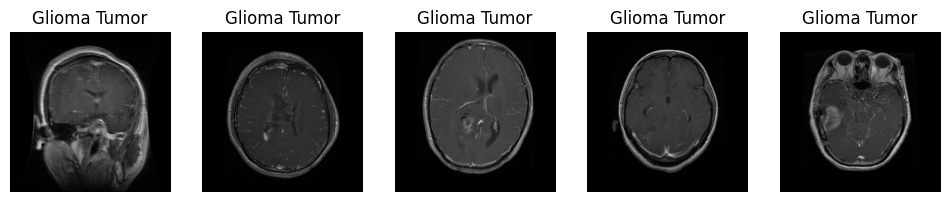

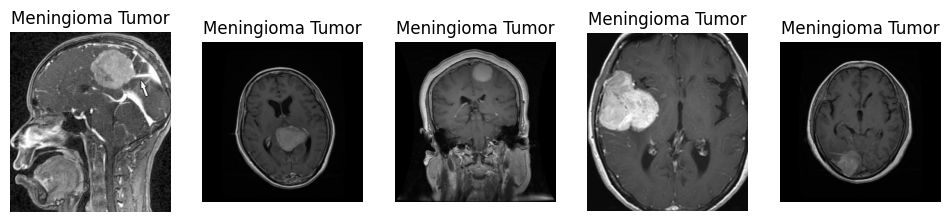

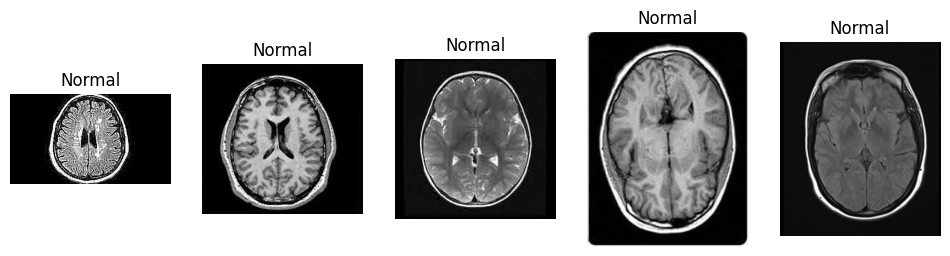

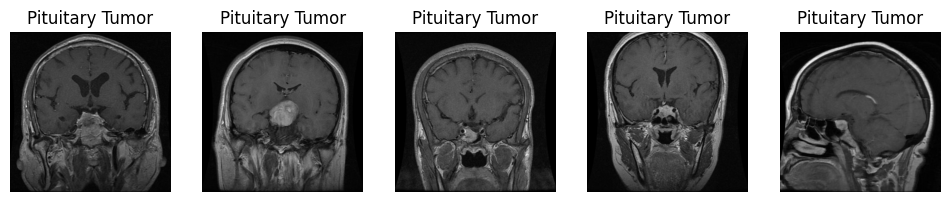

In [7]:

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming you have already set 'train_dir' and 'test_dir' to the correct paths
glioma_train_dir = os.path.join(train_dir, 'glioma')
meningioma_train_dir = os.path.join(train_dir, 'meningioma')
notumor_train_dir = os.path.join(train_dir, 'notumor')  # or change to 'no_tumor' if that is the correct folder name
pituitary_train_dir = os.path.join(train_dir, 'pituitary')

def display_sample_images(image_dir, title, num_samples=5):
    plt.figure(figsize=(12, 4))
    image_files = os.listdir(image_dir)[:num_samples]
    for i, img_file in enumerate(image_files):
        image_path = os.path.join(image_dir, img_file)
        img = mpimg.imread(image_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display images from each category
display_sample_images(glioma_train_dir, 'Glioma Tumor')
display_sample_images(meningioma_train_dir, 'Meningioma Tumor')
display_sample_images(notumor_train_dir, 'Normal')
display_sample_images(pituitary_train_dir, 'Pituitary Tumor')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


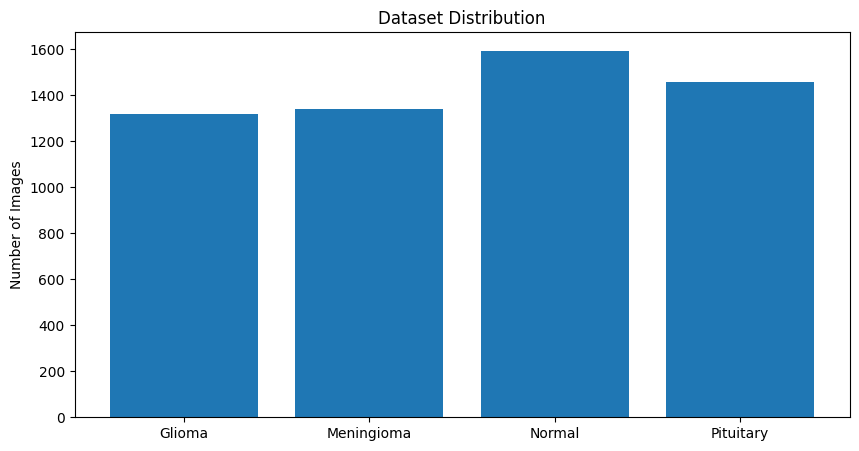

In [10]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Assuming 'archive (2)' is in the root of 'My Drive', set the base directory
base_dir = '/content/drive/My Drive/archive (2)'

# Define the paths to each category in the training dataset.
glioma_train_dir = os.path.join(base_dir, 'Training', 'glioma')
meningioma_train_dir = os.path.join(base_dir, 'Training', 'meningioma')
notumor_train_dir = os.path.join(base_dir, 'Training', 'notumor')  # Adjust if the folder name is different
pituitary_train_dir = os.path.join(base_dir, 'Training', 'pituitary')

# Function to count the number of images in each directory.
def get_image_count(image_dir):
    return len([name for name in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, name))])

# Get the image count for each category.
glioma_count = get_image_count(glioma_train_dir)
meningioma_count = get_image_count(meningioma_train_dir)
normal_count = get_image_count(notumor_train_dir)
pituitary_count = get_image_count(pituitary_train_dir)

# Plot the distribution of the dataset.
plt.figure(figsize=(10, 5))
plt.bar(['Glioma', 'Meningioma', 'Normal', 'Pituitary'], [glioma_count, meningioma_count, normal_count, pituitary_count])
plt.ylabel('Number of Images')
plt.title('Dataset Distribution')
plt.show()


In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Assuming 'archive (2)' is directly in your 'My Drive', set the base directory
base_dir = '/content/drive/My Drive/archive (2)'

# Define the paths to your original training dataset
original_train_dir = os.path.join(base_dir, 'Training')

# Define paths to the new training and validation directories
working_dir = '/content/drive/My Drive/path_to_your_dataset_folder'  # replace with your path
train_dir = os.path.join(working_dir, 'train')
val_dir = os.path.join(working_dir, 'val')

# Function to get all image paths with specific extensions
def get_image_paths(directory_path):
    image_paths = []
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Function to organize data into training and validation sets
def organize_data(image_paths, label, train_dir, val_dir, test_size=0.2):
    train_paths, val_paths = train_test_split(image_paths, test_size=test_size, random_state=42)
    def copy_images(paths, dest_dir):
        os.makedirs(dest_dir, exist_ok=True)
        for path in paths:
            shutil.copy(path, os.path.join(dest_dir, os.path.basename(path)))
    train_label_dir = os.path.join(train_dir, label)
    val_label_dir = os.path.join(val_dir, label)
    copy_images(train_paths, train_label_dir)
    copy_images(val_paths, val_label_dir)
    return len(train_paths), len(val_paths)

# Ensure the 'train' and 'val' directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get image paths and organize data for each category
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for category in categories:
    image_paths = get_image_paths(os.path.join(original_train_dir, category))
    num_train, num_val = organize_data(image_paths, category, train_dir, val_dir)
    print(f'Category: {category}, Training images: {num_train}, Validation images: {num_val}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Category: glioma, Training images: 1056, Validation images: 265
Category: meningioma, Training images: 1071, Validation images: 268
Category: notumor, Training images: 1276, Validation images: 319
Category: pituitary, Training images: 1165, Validation images: 292


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have already set 'train_dir' and 'val_dir' to the correct paths
# as shown in previous steps, for example:
# train_dir = '/content/drive/My Drive/path_to_your_dataset_folder/train'
# val_dir = '/content/drive/My Drive/path_to_your_dataset_folder/val'

# Initialize the data generators with the ResNet preprocessing function
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input
)

# Prepare data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(224, 224),  # All images will be resized to 224x224
    batch_size=32,
    class_mode='categorical'  # Since we use categorical_crossentropy loss, we need categorical labels
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,  # This is the source directory for validation images
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 4568 images belonging to 4 classes.
Found 1144 images belonging to 4 classes.


In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the ResNet50 model pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False)

# Add new layers on top of the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First, we'll freeze all the layers from the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 1s 0us/step


In [14]:
history = model.fit(
    train_generator,
    epochs=10,  # The number of epochs to train for
    validation_data=validation_generator
)


Epoch 1/10
143/143 [==============================] - 1509s 11s/step - loss: 0.6397 - accuracy: 0.8041 - val_loss: 0.2821 - val_accuracy: 0.8916
Epoch 2/10
143/143 [==============================] - 1397s 10s/step - loss: 0.3191 - accuracy: 0.8746 - val_loss: 0.4592 - val_accuracy: 0.8234
Epoch 3/10
143/143 [==============================] - 1373s 10s/step - loss: 0.2846 - accuracy: 0.8905 - val_loss: 0.2722 - val_accuracy: 0.8960
Epoch 4/10
143/143 [==============================] - 1427s 10s/step - loss: 0.2389 - accuracy: 0.9072 - val_loss: 0.2187 - val_accuracy: 0.9117
Epoch 5/10
143/143 [==============================] - 1442s 10s/step - loss: 0.2497 - accuracy: 0.9032 - val_loss: 0.2864 - val_accuracy: 0.8995
Epoch 6/10
143/143 [==============================] - 1378s 10s/step - loss: 0.2172 - accuracy: 0.9181 - val_loss: 0.1814 - val_accuracy: 0.9371
Epoch 7/10
143/143 [==============================] - 1355s 9s/step - loss: 0.1960 - accuracy: 0.9278 - val_loss: 0.2114 - val_acc

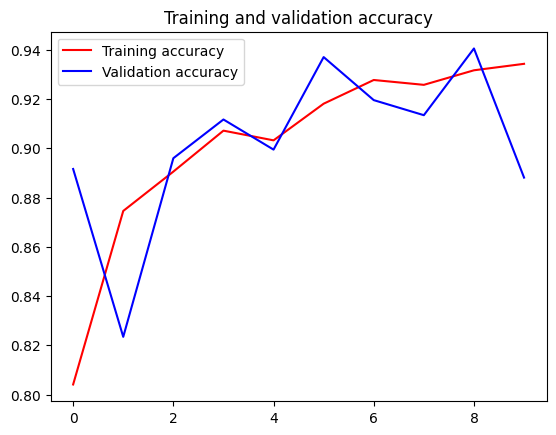

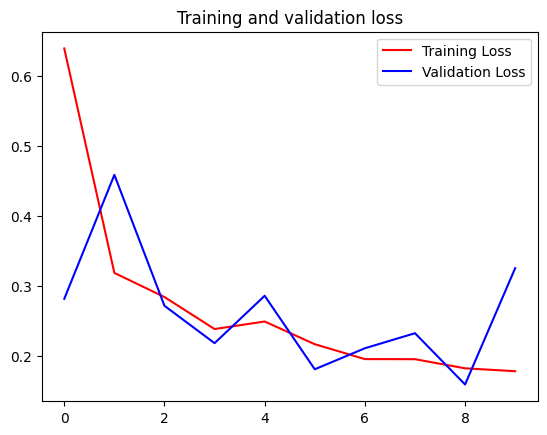

In [15]:
# Plot the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [16]:
model.save('/content/drive/My Drive/path_to_your_model_directory/my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.save('my_model.keras')

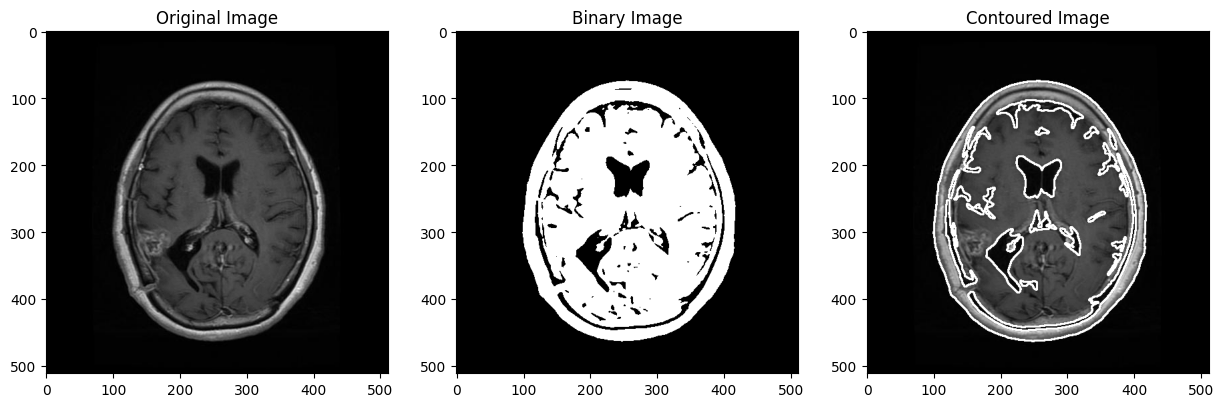

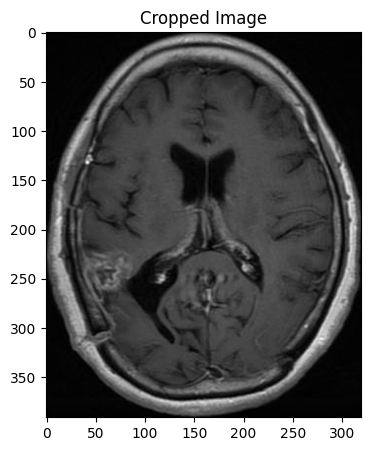

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
_, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours that are not tumors
detected_tumors = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Area threshold to be adjusted based on your images
        detected_tumors.append(contour)

# Draw the detected tumor contours on the original image
contoured_image = image.copy()
cv2.drawContours(contoured_image, detected_tumors, -1, (255, 0, 0), 2)

if detected_tumors:
    x, y, w, h = cv2.boundingRect(detected_tumors[0])
    cropped_image = image[y:y+h, x:x+w]

# Display the original and processed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Contoured Image')
plt.imshow(contoured_image, cmap='gray')


if 'cropped_image' in locals():
    plt.figure(figsize=(5, 5))
    plt.title('Cropped Image')
    plt.imshow(cropped_image, cmap='gray')

plt.show()


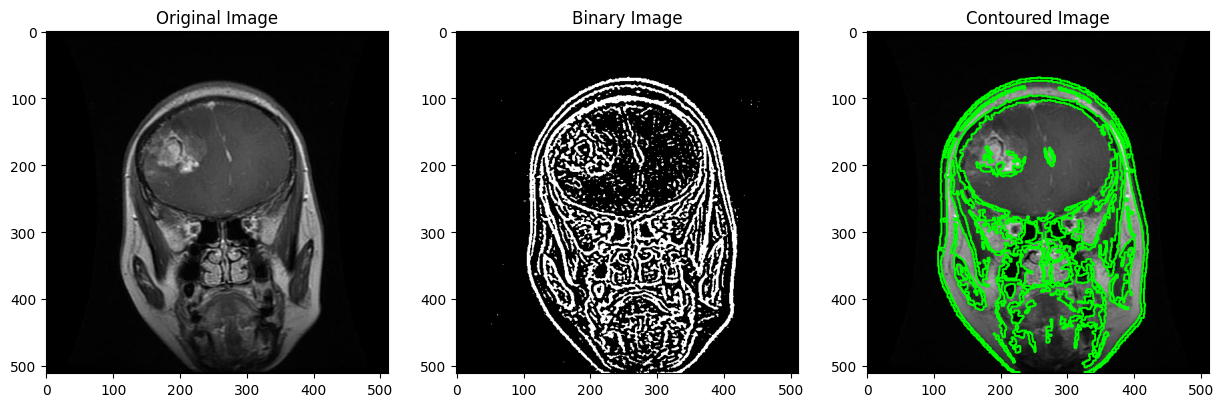

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt


image_path = '/content/drive/MyDrive/archive (2)/Training/glioma/Tr-glTr_0000.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)
binary_image = cv2.adaptiveThreshold(
    blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2)
kernel = np.ones((3, 3), np.uint8)
morph_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_OPEN, kernel)
contours, _ = cv2.findContours(morph_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

contoured_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for coloring
cv2.drawContours(contoured_image, filtered_contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Contoured Image')
plt.imshow(contoured_image)

plt.show()



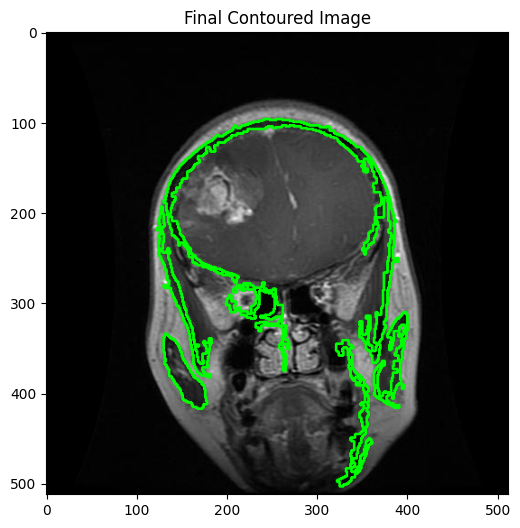

In [ ]:

from skimage import measure
contours_info = [cv2.contourArea(c) for c in filtered_contours]
contours_info = [{'contour': c, 'area': cv2.contourArea(c), 'perimeter': cv2.arcLength(c, True)} for c in filtered_contours]
contours_filtered_by_properties = [info['contour'] for info in contours_info if 1000 < info['area'] < 5000]

final_contoured_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for coloring
cv2.drawContours(final_contoured_image, contours_filtered_by_properties, -1, (0, 255, 0), 2)

plt.figure(figsize=(6, 6))
plt.title('Final Contoured Image')
plt.imshow(final_contoured_image)
plt.show()


# **Deep L Technique**

# **Task 2: As a computer vision engineer, extract the white part of the image called the test.**

The white region represents the tumor.

Your task is to isolate and extract the white portion from the image.

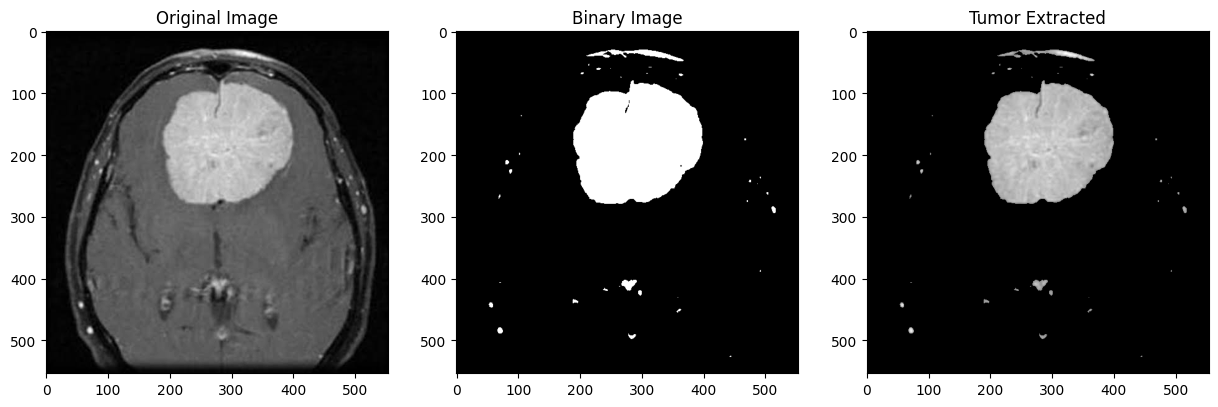

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/test.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error loading image")
else:
    # Apply a threshold
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an all-black mask image
    mask = np.zeros_like(image)

    # Fill the contours - this will fill the tumor areas with white color
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Extract the tumor from the original image using the mask
    tumor_extracted = cv2.bitwise_and(image, image, mask=mask)

    # Display the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')

    plt.subplot(1, 3, 3)
    plt.imshow(tumor_extracted, cmap='gray')
    plt.title('Tumor Extracted')

    plt.show()


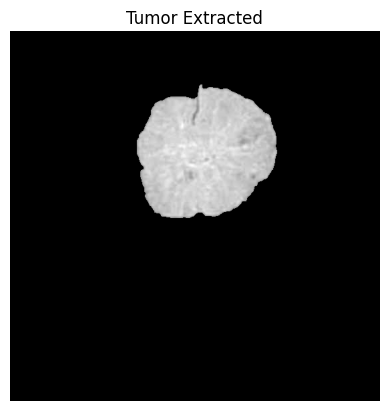

In [30]:

# Define a kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Apply morphological opening to remove small spots
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Apply morphological closing to close small holes
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Find connected components
num_labels, labels_im, stats, _ = cv2.connectedComponentsWithStats(closing)

# Find the largest connected component (excluding the background)
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
mask_largest_component = np.zeros_like(labels_im, dtype=np.uint8)
mask_largest_component[labels_im == largest_label] = 255

# Use the mask to extract the tumor from the original image
tumor_extracted = cv2.bitwise_and(image, image, mask=mask_largest_component)



# Use matplotlib to display the image
plt.imshow(tumor_extracted, cmap='gray')  # cmap='gray' is used to display the image in grayscale
plt.title('Tumor Extracted')
plt.axis('off')  # let's Hide the axis ticks and labels ti make it clearer
plt.show()

